In [20]:
import matplotlib.pyplot as plt
from numpy import linspace, pi
import swarms

#### Plotting Dc vs Dmin keeping $\sigma_{tot}$ and $M_{tot}$ constant

Using eq.(4) from Kennedy & Wyatt 2011,
\begin{equation}
    \bigg(\frac{M_{tot}}{M_{moon}}\bigg) = 2 \times 10^{-9}\bigg(\frac{\rho}{kgm^{-3}}\bigg) \bigg(\frac{\sigma_{tot}}{R_{jup}^2}\bigg) \bigg(\frac{D_c}{m}\bigg)^{0.9} \bigg(\frac{D_{min}}{m}\bigg)^{0.7} 
\end{equation}

The constrast ratio (CR) is given as,
\begin{equation}
    CR = \frac{F_{swarm}}{F_*^{d_{pl}}} = \frac{\sigma_{tot}gQ}{a_{pl}^2 \pi}
\end{equation}

Using the same eq.(4) to get the CR with respect to the swarm mass,
\begin{equation}
    CR = 5 \times 10^8 \frac{ \bigg(\frac{M_{tot}}{M_{moon}}\bigg) g Q }{ \bigg(\frac{D_c}{m}\bigg)^{0.9} \bigg(\frac{D_{min}}{m}\bigg)^{0.7} \bigg(\frac{a_{pl}}{R_{jup}}\bigg)^2 \pi \bigg(\frac{\rho}{kgm^{-3}}\bigg) }
\end{equation}

$D_{min}$ is given by eq.(9) from Kennedy & Wyatt 2011,
\begin{equation}
    \bigg(\frac{D_{min}}{m}\bigg) = 4.62 \times 10^{10} \frac{ \eta^{1/2} \bigg(\frac{L_*}{L_{\odot}}\bigg) }{ \bigg(\frac{\rho}{kgm^{-3}}\bigg) \bigg(\frac{M_{pl}}{M_{moon}}\bigg)^{1/3} \bigg(\frac{M_*}{M_{\odot}}\bigg)^{2/3} }
\end{equation}

If we assume $L_* \propto M_*^4$, then we can write CR as,
\begin{equation}
    CR = 17.13 \frac{ \bigg(\frac{M_{pl}}{M_{moon}}\bigg)^{7/30} \bigg(\frac{M_{tot}}{M_{moon}}\bigg) g Q }{ \bigg( \frac{D_c}{m} \bigg)^{0.9} \bigg(\frac{M_*}{M_{\odot}}\bigg)^{7/3} \eta^{7/20} \bigg(\frac{a_{pl}}{R_{jup}}\bigg)^2 \pi \bigg(\frac{\rho}{kgm^{-3}}\bigg)^{3/10} }
\end{equation}

In [3]:
Mmoon = 7.34767309e22
Rjup = 7.1492e7
AU = 1.496e11

# Fix different M_tot
Mtot100 = 100
Mtot10 = 10
Mtot1 = 1

# Fix different sigma_tot
sigma_tot6 = 1e-6 * AU**2 / Rjup**2
sigma_tot7 = 1e-7 * AU**2 / Rjup**2
sigma_tot8 = 1e-8 * AU**2 / Rjup**2

# Fix different Dmin
Dmin0165 = 1.65 * 1e-6
Dmin0500 = 5.00 * 1e-6
Dmin1200 = 12.00 * 1e-6
Dmin2300 = 23.00 * 1e-6

rho = 1500
Dc = linspace(1e4, 1e7, 500)
Dmin = linspace(1.65 * 1e-6, 23 * 1e-6, 500)

In [4]:
# sig in Rjup^2
# M in Mmoon
# rest in SI
def dmin_to_dc(M, rho, sig, dmin):
    return (2e-9 * rho * sig * dmin**0.7 / M)**(-0.9)

def dc_to_sig(M, rho, dc, dmin):
    return M / (2e-9 * rho * dc**0.9 * dmin**0.7)

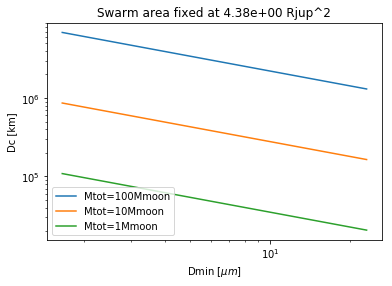

In [5]:
Dc100 = []
Dc10 = []
Dc1 = []
for i in range(len(Dmin)):
    Dc100.append(dmin_to_dc(Mtot100, rho, sigma_tot6, Dmin[i]) / 1000)
    Dc10.append(dmin_to_dc(Mtot10, rho, sigma_tot6, Dmin[i]) / 1000)
    Dc1.append(dmin_to_dc(Mtot1, rho, sigma_tot6, Dmin[i]) / 1000)

plt.figure(1)
plt.loglog(Dmin / 1e-6, Dc100, label="Mtot=100Mmoon")
plt.loglog(Dmin / 1e-6, Dc10, label="Mtot=10Mmoon")
plt.loglog(Dmin / 1e-6, Dc1, label="Mtot=1Mmoon")
plt.xlabel(r"Dmin $[\mu m]$")
plt.ylabel("Dc [km]")
plt.title("Swarm area fixed at {0:.2e}".format(sigma_tot6)+" Rjup^2")
plt.legend()
plt.show()

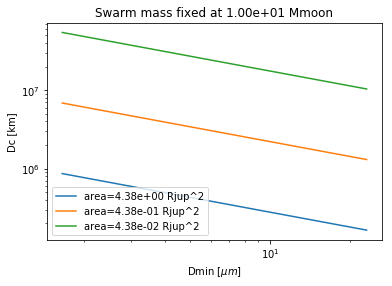

In [6]:
Dc6 = []
Dc7 = []
Dc8 = []
for i in range(len(Dmin)):
    Dc6.append(dmin_to_dc(Mtot10, rho, sigma_tot6, Dmin[i]) / 1000)
    Dc7.append(dmin_to_dc(Mtot10, rho, sigma_tot7, Dmin[i]) / 1000)
    Dc8.append(dmin_to_dc(Mtot10, rho, sigma_tot8, Dmin[i]) / 1000)

plt.figure(1)
plt.loglog(Dmin / 1e-6, Dc6, label="area={0:.2e}".format(sigma_tot6)+" Rjup^2")
plt.loglog(Dmin / 1e-6, Dc7, label="area={0:.2e}".format(sigma_tot7)+" Rjup^2")
plt.loglog(Dmin / 1e-6, Dc8, label="area={0:.2e}".format(sigma_tot8)+" Rjup^2")
plt.xlabel(r"Dmin $[\mu m]$")
plt.ylabel("Dc [km]")
plt.title("Swarm mass fixed at {0:.2e}".format(Mtot10)+" Mmoon")
plt.legend()
plt.show()

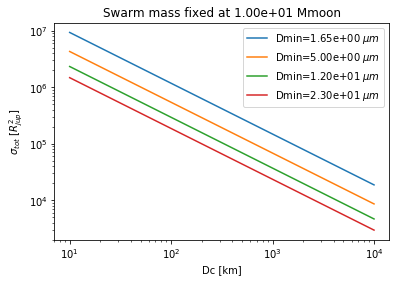

In [7]:
A0165 = []
A0500 = []
A1200 = []
A2300 = []

for i in range(len(Dc)):
    A0165.append(dc_to_sig(Mtot10, rho, Dc[i], Dmin0165))
    A0500.append(dc_to_sig(Mtot10, rho, Dc[i], Dmin0500))
    A1200.append(dc_to_sig(Mtot10, rho, Dc[i], Dmin1200))
    A2300.append(dc_to_sig(Mtot10, rho, Dc[i], Dmin2300))
    

plt.figure(1)
plt.loglog(Dc/1000, A0165, label="Dmin={0:.2e}".format(Dmin0165/1e-6)+r" $\mu m$")
plt.loglog(Dc/1000, A0500, label="Dmin={0:.2e}".format(Dmin0500/1e-6)+r" $\mu m$")
plt.loglog(Dc/1000, A1200, label="Dmin={0:.2e}".format(Dmin1200/1e-6)+r" $\mu m$")
plt.loglog(Dc/1000, A2300, label="Dmin={0:.2e}".format(Dmin2300/1e-6)+r" $\mu m$")
plt.xlabel("Dc [km]")
plt.ylabel(r"$\sigma_{tot}$ [$R_{jup}^2$]")
plt.title("Swarm mass fixed at {0:.2e}".format(Mtot10)+" Mmoon")
plt.legend()
plt.show()

#### $CR$ equation relationship

In [29]:
Mjup = 1.898e27
Msun = 2e30

Q = 0.08
g = 0.32
eta = 0.4
CR = 1e-6
Mpl = 2.58e4 # 1 Jup
apl = 50 * AU / Rjup # 50 AU

Mstar = linspace(7.5/100. * Msun, 60/100 * Msun, 500)

In [22]:
def Smass_to_dc(CR, M_pl, M_tot, Smass, apl):
    return ( 17.13 * M_pl**(7/30) * M_tot * g * Q / ( CR * Smass**(7/3) * eta**(7/20) * apl**2 * pi * rho**(3/10) ) )**(0.9)

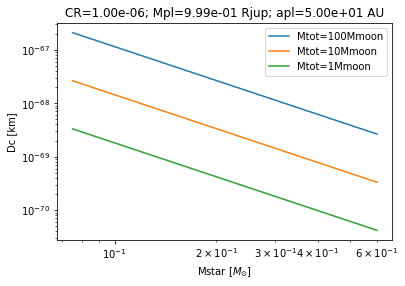

In [31]:
Dc100 = []
Dc10 = []
Dc1 = []
for i in range(len(Mstar)):
    Dc100.append(Smass_to_dc(CR, Mpl, Mtot100, Mstar[i], apl) / 1000)
    Dc10.append(Smass_to_dc(CR, Mpl, Mtot10, Mstar[i], apl) / 1000)
    Dc1.append(Smass_to_dc(CR, Mpl, Mtot1, Mstar[i], apl) / 1000)
    
plt.figure(1)
plt.loglog(Mstar / Msun, Dc100, label="Mtot=100Mmoon")
plt.loglog(Mstar / Msun, Dc10, label="Mtot=10Mmoon")
plt.loglog(Mstar / Msun, Dc1, label="Mtot=1Mmoon")
plt.xlabel(r"Mstar [$M_{\odot}$]")
plt.ylabel("Dc [km]")
plt.title("CR={0:.2e}".format(CR)+"; Mpl={0:.2e}".format(Mpl*Mmoon/Mjup)+" Rjup;"+" apl={0:.2e}".format(apl*Rjup/AU)+" AU")
plt.legend()
plt.show()